In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 5
from ipywidgets import interact
from sklearn import datasets

import matplotlib.image as mpimg
import numpy as np

from scipy import ndimage

In [10]:
def displayImg(img):
    plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [11]:
def getImage(digit, k):
    root = 'digit_' + str(digit) + '/'
    from os import listdir
    from os.path import isfile, join
    files = [f for f in listdir( root ) ]
    if k >= len(files):
        k = len(files) - 1
    img=mpimg.imread(root + files[k])
    return img
    
def getImageWithFeatures(digit, n_features):
    root = 'digit_' + str(digit) + '/'
    from os import listdir
    from os.path import isfile, join
    files = [f for f in listdir( root ) ]
    
    if n_features >= len(files):
        print "too many features"
        n_features = len(files) - 1
    if n_features < 1:
        print "not enough features"
    added = set()
    r = random.choice( range(7))
    added.add(r)
    img = filterImg( getImage(digit, r) )
    for i in range(1,n_features):
        while r in added:
            r = random.choice( range(10) )
        added.add(r)
        img = 0.5 * addOr(img , filterImg(getImage(digit, r)))  
        
    return img

def addOr( A, B ):
    M = np.zeros( A.shape)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if A[i,j] or B[i,j]:
                M[i,j] = max( A[i,j] , B[i,j] )
            else:
                M[i,j] = 0
    return M

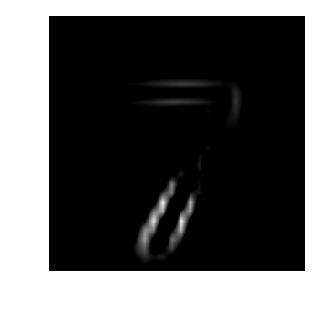

In [12]:
displayImg( getImageWithFeatures(7, 4) )

In [13]:
THRES = 0.3
c = 2
l = -1.1
def filterImg( img ): # contrast, luminosity, image
#     tresh = np.average(img) - 0.2
    result = np.zeros((img.shape[0], img.shape[1]) )
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            contrast_value = float(c) * float(img[i,j,1]) + float(l)
            if contrast_value > 1:
                contrast_value = 1
            if contrast_value < 0:
                contrast_value = 0
            if contrast_value > THRES:
                v = 1
            else:
                v = 0
            result[i,j] = contrast_value #v
#             for k in range(img.shape[2]):
#                 result[i,j,k] = v # img[i,j,0]
    return result

not enough features


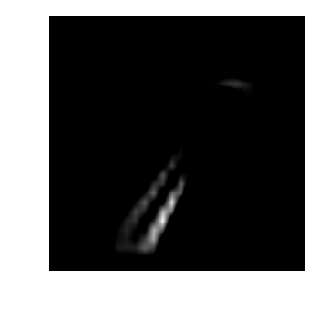

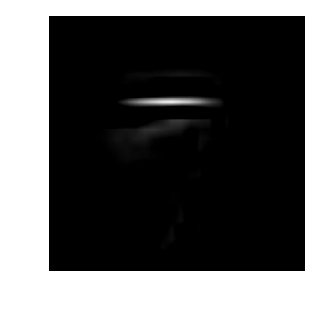

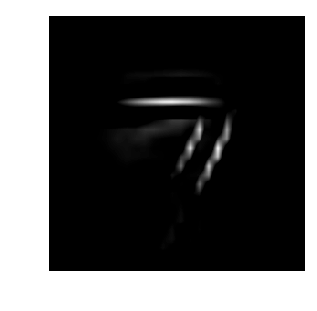

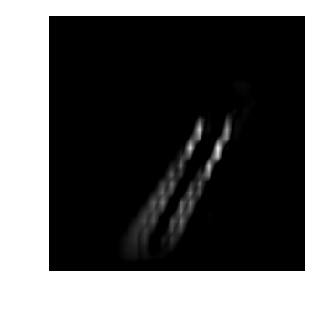

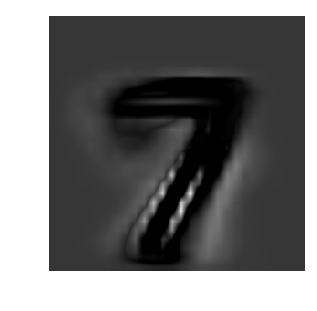

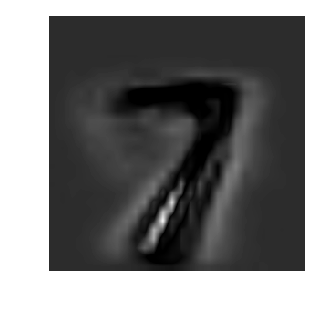

In [17]:
for i in range(6):
    displayImg(  getImageWithFeatures(7, i) ) 

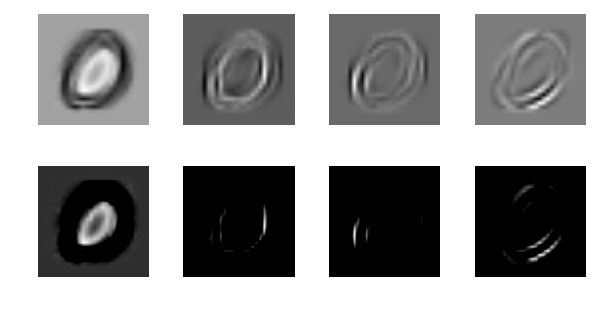

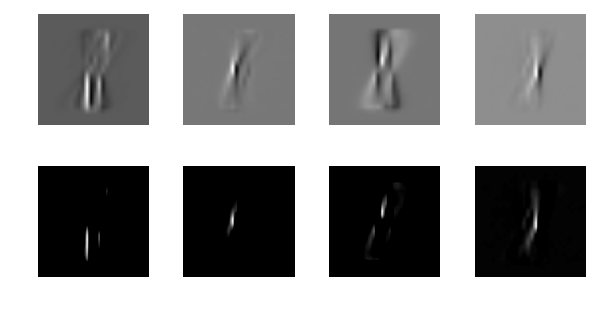

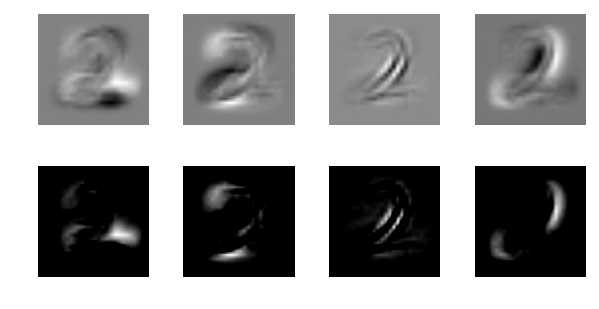

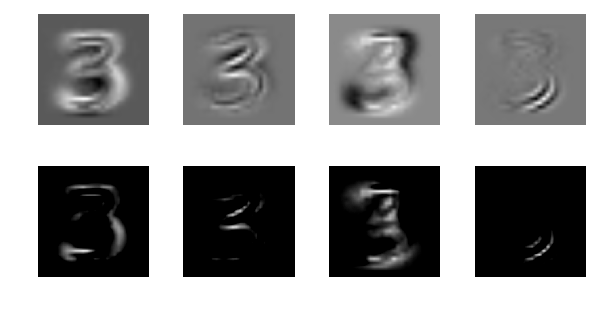

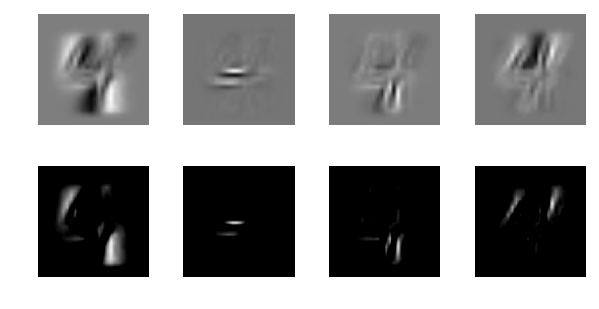

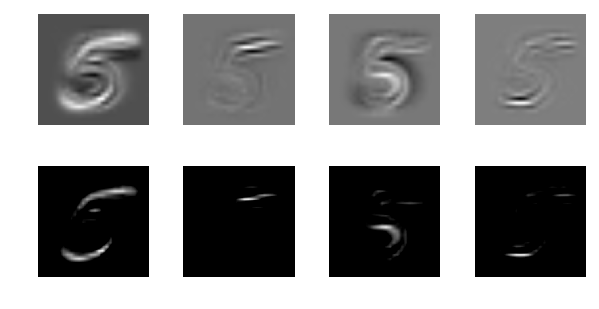

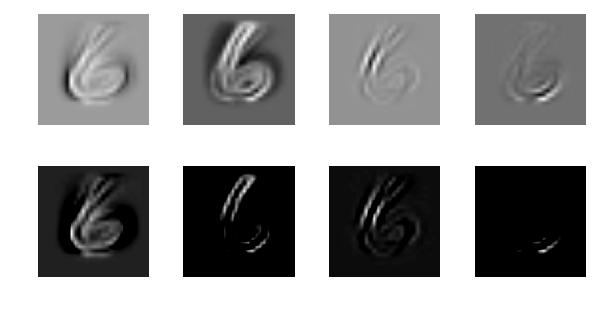

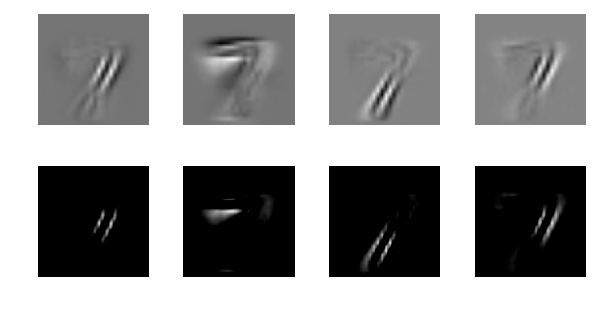

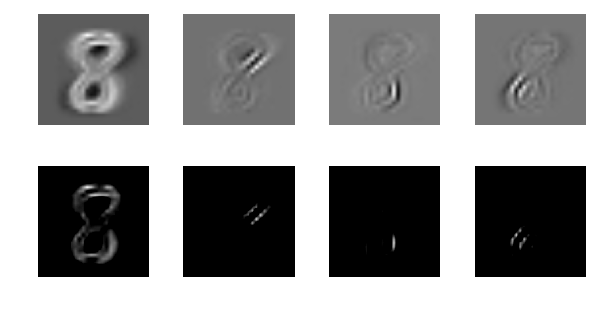

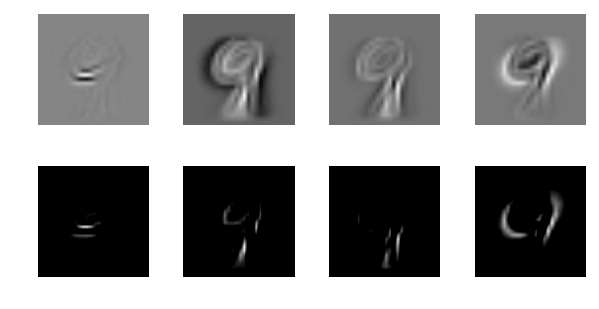

In [19]:
matplotlib.rcParams['figure.figsize'] = 10, 5
for i in range(10):
    f, ((ax1, ax2, ax3, ax4), (f1, f2, f3, f4) ) = plt.subplots( ncols=4, nrows =2,  sharex=True, sharey=True)
    img0 = getImage(i,0)
    img1 = getImage(i,1)
    img2 = getImage(i, 2)
    img3 = getImage(i, 3)
#     displayImg(filterImg(img))
    ax1.imshow(img0, cmap=plt.cm.gray, interpolation='nearest')
    ax2.imshow(img1, cmap=plt.cm.gray, interpolation='nearest')
    ax3.imshow(img2, cmap=plt.cm.gray, interpolation='nearest')
    ax4.imshow(img3, cmap=plt.cm.gray, interpolation='nearest')
    f1.imshow(filterImg(img0), cmap=plt.cm.gray, interpolation='nearest')
    f2.imshow(filterImg(img1), cmap=plt.cm.gray, interpolation='nearest')
    f3.imshow(filterImg(img2), cmap=plt.cm.gray, interpolation='nearest')
    f4.imshow(filterImg(img3), cmap=plt.cm.gray, interpolation='nearest')
#     displayImg(img)
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    f1.axis('off')
    f2.axis('off')
    f3.axis('off')
    f4.axis('off')
    plt.show()

# Experiment

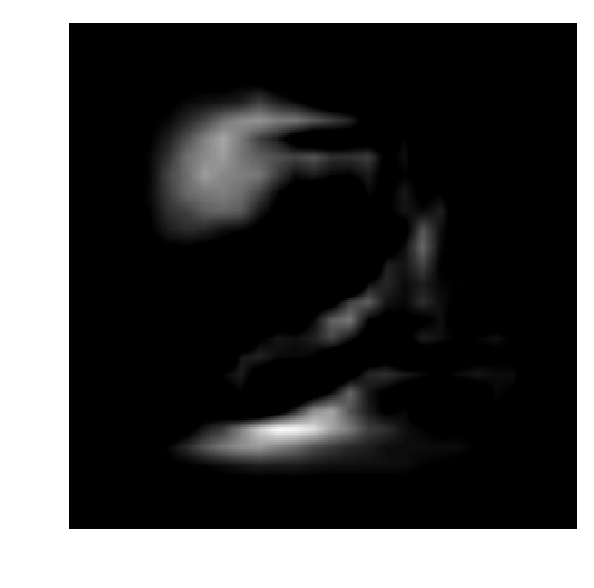

In [8]:
matplotlib.rcParams['figure.figsize'] = 10, 10
import ipywidgets as widgets
from IPython.display import display
import random
from IPython.display import clear_output
import time
import random
import pickle

N_features_max = 6

pickle.dump( 0, open( "index.p", "wb" ) )
N = 200
indices_test = []
for i in range(N):
    indices_test.append( { 'digit' :random.choice( range(1, 10)), "features" : random.choice(range(1, N_features_max)) } )

result = []
times = []
refs = []

btns = []
for i in range(10):
    btn = widgets.Button(description= str(i) )
    btns.append(btn)
    
display(widgets.HBox((btns[7], btns[8], btns[9])))
display(widgets.HBox((btns[4], btns[5], btns[6])))
display(widgets.HBox((btns[1], btns[2], btns[3])))
display(widgets.HBox((widgets.Button(), btns[0], widgets.Button())))

def view_image(i,j,t):
    vec = data_test[i][j][t]
    I=imageFromVector( vec )
    plt.imshow( I, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()



def button_action():
    index = pickle.load( open( "index.p", "rb" ) )
    i = indices_test[index]['digit']
    nb_features = indices_test[index]['features']
    clear_output()
    img = getImageWithFeatures(i, nb_features)
    plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')
    plt.show()
    refs.append(index)
    times.append( time.time() )
    index+=1
    pickle.dump( index, open( "index.p", "wb" ) )
    
on_btns = []
# for i in range(10):
#     def fff(b):
#         print str(i)
        
#     on_btns.append( fff )
    

def f0(b):
    button_action()
    result.append(0)
def f1(b):
    button_action()
    result.append(1)
def f2(b):
    button_action()
    result.append(2)
def f3(b):
    button_action()
    result.append(3)
def f4(b):
    button_action()
    result.append(4)
def f5(b):
    button_action()
    result.append(5)
def f6(b):
    button_action()
    result.append(6)
def f7(b):
    button_action()
    result.append(7)
def f8(b):
    button_action()
    result.append(8)
def f9(b):
    button_action()
    result.append(9)


on_btns.append( f0 )
on_btns.append( f1 )
on_btns.append( f2 )
on_btns.append( f3 )
on_btns.append( f4 )
on_btns.append( f5 )
on_btns.append( f6 )
on_btns.append( f4 )
on_btns.append( f8 )
on_btns.append( f9 )

    
for i in range(10):
    btns[i].on_click( on_btns[i] )

In [382]:
print result
print refs
print times
pickle.dump( result, open( "res1.p", "wb" ) )
pickle.dump( refs, open( "ref1.p", "wb" ) )
pickle.dump( times, open( "ti1.p", "wb" ) )
pickle.dump( indices_test, open( "indices_test1.p", "wb" ) )


[5, 4, 5, 6, 2, 6, 5, 6, 4, 4, 5, 1, 5, 3, 5, 8, 6, 4, 3, 5, 5, 2, 5, 9, 1, 1, 5, 3, 5, 2, 1, 2, 4, 1, 2, 1, 4, 5, 4, 5, 4, 8, 6, 6, 8, 1, 4, 1, 4, 1, 3, 1, 4, 3, 8, 1, 2, 4, 5, 1, 4, 6, 4, 3, 6, 2, 8, 5, 5, 2, 9, 4, 5, 6, 4, 1, 9, 4, 3, 9, 1, 6, 3, 2, 2, 8, 9, 4, 4, 6, 5, 4, 2, 2, 4, 4, 5, 4, 9, 3, 5, 5, 1, 1, 6, 4, 1, 8, 4, 6, 4, 2, 8, 4, 5, 4, 2, 8, 5, 1, 4, 5, 1, 1, 2, 4, 9, 4, 1, 1, 1, 1, 9, 5, 6, 8, 9, 6, 5, 4, 8, 1, 4, 6, 4, 5, 8, 1, 5, 4, 8, 5, 3, 9, 5, 2, 6, 8, 5, 4, 8, 3, 3, 3, 6, 4, 4, 8, 4, 2, 6, 4, 6, 9, 8, 1, 8, 1, 6, 6, 2, 2, 2, 6, 4, 5, 8, 1, 4, 1, 8, 4, 4, 3, 4, 4, 8, 5, 9, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101

In [383]:
offset_time = []
for i in range(1, len(times)):
    offset_time.append( times[i] - times[i-1])
print len(offset_time)
res_trunc = result[1:]
refs_trunc = refs[1:]
print len(res_trunc)
print len(refs_trunc)

199
199
199


In [384]:

score_per_digit = dict()
for i in range(1,N_features_max):
    tmp = dict()
    tmp['time'] = []
    tmp['score'] = []
    score_per_digit[i] = tmp
for i in range(len(res_trunc)):
    score_per_digit[indices_test[refs_trunc[i]]['features']]['time'].append(offset_time[i])
    score_per_digit[indices_test[refs_trunc[i]]['features']]['score'].append(int( res_trunc[i] == indices_test[refs_trunc[i]]['digit'] ))

for i in score_per_digit:
    score_per_digit[i]['average_score'] = float(sum(score_per_digit[i]['score']))/float(len(score_per_digit[i]['score']))
    score_per_digit[i]['average_time'] = float(sum(score_per_digit[i]['time']))/float(len(score_per_digit[i]['time']))
    
print score_per_digit

{1: {'average_time': 1.2660333553949992, 'average_score': 0.06666666666666667, 'score': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'time': [1.1329998970031738, 1.1449999809265137, 1.0109999179840088, 1.2210001945495605, 1.186000108718872, 1.1800000667572021, 1.178999900817871, 1.2660000324249268, 1.184000015258789, 1.1450002193450928, 2.695000171661377, 1.5469999313354492, 1.0829999446868896, 1.2409999370574951, 1.1820001602172852, 1.7939999103546143, 0.9620001316070557, 1.2039999961853027, 1.2619998455047607, 1.133000135421753, 1.24399995803833, 1.0869998931884766, 0.9229998588562012, 1.180999994277954, 1.4869999885559082, 1.3500001430511475, 1.2820000648498535, 1.1630001068115234, 1.3020000457763672, 1.2090001106262207]}, 2: {'average_time': 1.4819230605394413, 'average_score': 0.10256410256410256, 'score': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'time': [1.

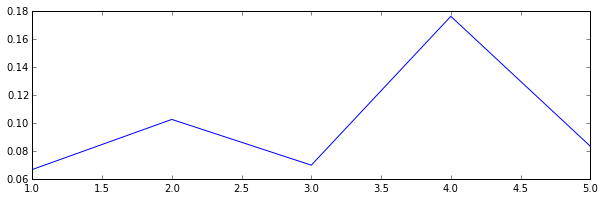

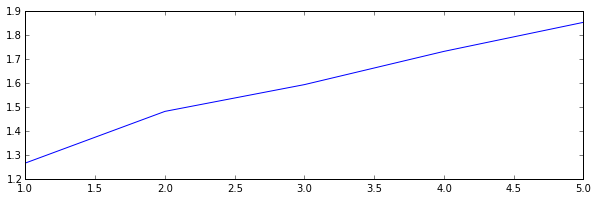

In [386]:
matplotlib.rcParams['figure.figsize'] = 10, 3
x = score_per_digit.keys()
yt = [ d['average_time'] for d in score_per_digit.values()]
ys = [ score_per_digit[d]['average_score'] for d in score_per_digit]

plt.plot(x,ys)
plt.show()
plt.plot(x, yt)
plt.show()